
Student Id : 001245231


# Installing necessary packages

In [3]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing all the necessary libraries at start


In [1]:
# Load python modules

import numpy as np # numpy is a library that allows us to work with vectors and matrices
import matplotlib.pyplot as plt # visualisation library
import pandas as pd # pandas is a library that allows us to work with DataFrames 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import warnings
# Load python modules
import numpy as np # numpy is a library that allows us to work with vectors and matrices
import matplotlib.pyplot as plt # visualisation library
import pandas as pd # pandas is a library that allows us to work with DataFrames 
from sklearn.model_selection import train_test_split
# On some level, dataframes are enhanced matrices where we have assigned names to each
# row and each column.
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import warnings
from imblearn.pipeline import Pipeline as ImbPipeline
# On some level, dataframes are enhanced matrices where we have assigned names to each
# row and each column.


In [2]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from scipy import stats
from sklearn.metrics import balanced_accuracy_score
from time import time as tt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
np.random.seed(0)

In [4]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

Reading in the road accident data 

In [6]:
from google.colab import files
import io

uploaded = files.upload()    # Will prompt you to select file: remember to choose the right one!
data = pd.read_csv(io.BytesIO(uploaded['OPTION1_uk_road_accident_2019_coursework_final.csv']))

Saving OPTION1_uk_road_accident_2019_coursework_final.csv to OPTION1_uk_road_accident_2019_coursework_final.csv


In [7]:
# making a copy of the data set
WorkingData = data.copy()

# EDA and Data Quality Assessment 

checking the dimentions of the data


In [8]:
print(WorkingData.shape)

(31647, 14)


printing the columns

In [9]:
print(WorkingData.columns)

Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')


displaying the statistical summary

In [10]:
WorkingData.describe()

,speed_limit,age_of_oldest_driver
count,31647.000000,25197.000000
mean,36.572029,47.254038
std,13.837362,16.779656
min,-1.000000,6.000000
25%,30.000000,34.000000
50%,30.000000,47.000000
75%,40.000000,59.000000
max,70.000000,101.000000


Print the top 10 row of the data set


In [11]:
WorkingData.head(10)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
5,2019400862270,60,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,male and female,NaN,serious
6,2019420894599,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,40.0,fatal
7,2019010162791,50,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,slight
8,2019360909153,60,daylight,fine,dry,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,fatal
9,2019500856761,60,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,male and female,60.0,fatal


Printing the data types of each column

In [12]:
print("The data types of the columns:\n\n", WorkingData.dtypes)

The data types of the columns:

 accident_index                  object
speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object


Getting the count of all the NAN in the data set


In [13]:
WorkingData.isna().sum()

accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64

Printing the distributions of each column

In [14]:
# let's list all categorical features
categorical_columns= ['light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact',
       'accident_severity', 'sex_of_driver']
# Question: why have we not included Loan_ID?

# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(WorkingData[col].value_counts())
  print()

Categories and number of occurrences for 'light_conditions'


,light_conditions
daylight,22210
darkness,9437



Categories and number of occurrences for 'weather_conditions'


,weather_conditions
fine,25152
other,5407
data missing or out of range,970
fog or mist,118



Categories and number of occurrences for 'road_surface_conditions'


,road_surface_conditions
dry,22092
wet or damp,8761
other,374
data missing or out of range,365
flood over 3cm. deep,55



Categories and number of occurrences for 'vehicle_type'


,vehicle_type
only cars,17487
at least one biped,8662
at least one van,4040
biped and van,1000
other,395
data missing or out of range,63



Categories and number of occurrences for 'junction_location'


,junction_location
at or within 20 metres of junction,17204
not at or within 20 metres of junction,12973
data missing or out of range,1470



Categories and number of occurrences for 'skidding_and_overturning'


,skidding_and_overturning
no skidding or overturning,24387
at least one vehicle skidded or overturned,5226
data missing or out of range,2034



Categories and number of occurrences for 'vehicle_leaving_carriageway'


,vehicle_leaving_carriageway
none leaving carriageway,24019
at least one vehicle leaving carriageway,5661
data missing or out of range,1967



Categories and number of occurrences for 'hit_object_off_carriageway'


,hit_object_off_carriageway
none hit an object,26129
at least one vehicle hit an object,3655
data missing or out of range,1863



Categories and number of occurrences for 'first_point_of_impact'


,first_point_of_impact
at least one vehicle with frontal impact,23002
other points of impact,6008
no impact,1333
data missing or out of range,1304



Categories and number of occurrences for 'accident_severity'


,accident_severity
slight,12672
serious,11592
fatal,6159
Serious,25
Slight,19
Fatal,8



Categories and number of occurrences for 'sex_of_driver'


,sex_of_driver
all males,15494
male and female,7015
data missing or out of range,5122
all females,4016


# Data Preprocessing

accident_serverity have value that mean the same word but some have the first letter as upper case.

In [15]:
WorkingData.loc[WorkingData.accident_severity=='Slight','accident_severity'] = 'slight'
WorkingData.loc[WorkingData.accident_severity=='Serious','accident_severity'] = 'serious'
WorkingData.loc[WorkingData.accident_severity=='Fatal','accident_severity'] = 'fatal'

Replacing 'data missing or out of range' with 'NaN' 

In [16]:
# replace out of scope value for the columns values with NaN
accepted_weather_conditions = ['fine','other','fog or mist']
accepted_road_surface_conditions = ['dry','wet or damp','other','flood over 3cm. deep']
accepted_vehicle_type = ['only cars','at least one biped','at least one van','biped and van','other']
accepted_junction_location = ['at or within 20 metres of junction','not at or within 20 metres of junction']
accepted_skidding_and_overturning = ['no skidding or overturning','at least one vehicle skidded or overturned']
accepted_vehicle_leaving_carriageway = ['none leaving carriageway','at least one vehicle leaving carriageway']
accepted_hit_object_off_carriageway = ['none hit an object','at least one vehicle hit an object']
accepted_first_point_of_impact = ['at least one vehicle with frontal impact','other points of impact','no impact']
accepted_sex_of_driver = ['all males','male and female','all females']


# remember the lambda notation: it is an anonymous function that lets us specificy
# a given (and easy) transformation for its input (in this case, x)
WorkingData.loc[WorkingData.weather_conditions.map(lambda x: x not in accepted_weather_conditions),'weather_conditions'] = np.nan
WorkingData.loc[WorkingData.road_surface_conditions.map(lambda x: x not in accepted_road_surface_conditions),'road_surface_conditions'] = np.nan
WorkingData.loc[WorkingData.vehicle_type.map(lambda x: x not in accepted_vehicle_type),'vehicle_type'] = np.nan
WorkingData.loc[WorkingData.junction_location.map(lambda x: x not in accepted_junction_location),'junction_location'] = np.nan
WorkingData.loc[WorkingData.skidding_and_overturning.map(lambda x: x not in accepted_skidding_and_overturning),'skidding_and_overturning'] = np.nan
WorkingData.loc[WorkingData.vehicle_leaving_carriageway.map(lambda x: x not in accepted_vehicle_leaving_carriageway),'vehicle_leaving_carriageway'] = np.nan
WorkingData.loc[WorkingData.hit_object_off_carriageway.map(lambda x: x not in accepted_hit_object_off_carriageway),'hit_object_off_carriageway'] = np.nan
WorkingData.loc[WorkingData.first_point_of_impact.map(lambda x: x not in accepted_first_point_of_impact),'first_point_of_impact'] = np.nan
WorkingData.loc[WorkingData.sex_of_driver.map(lambda x: x not in accepted_sex_of_driver),'sex_of_driver'] = np.nan
#replacing the -1 with an NaN
WorkingData.loc[WorkingData.speed_limit==-1,'speed_limit'] = np.nan

Dealing with NaNs-Since all our NaN are categorical value we replace them with the most common values.

In [17]:
from sklearn.impute import SimpleImputer 

# data_no_nans =  data.copy()

categorical_columns= ['light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact'
       , 'sex_of_driver']
### insert code here; work on the: train_dataset_no_nans
# 1. Imputer
imptr_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix (only for categorical features)
imptr_cat = imptr_cat.fit(WorkingData[categorical_columns])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
WorkingData[categorical_columns] = imptr_cat.transform(WorkingData[categorical_columns])  


dealing with missing values of the 'age_of_oldest_driver' - replace by the mean

In [18]:
# 1. Imputer
imptr_num = SimpleImputer(missing_values = np.nan, strategy = 'median')  


# 2. Fit the imputer object to the feature matrix (only for numeric features)
numerical_columns = ['speed_limit', 'age_of_oldest_driver']
imptr_num = imptr_num.fit(WorkingData[numerical_columns]) # fit the data to estimate the parameters (here, the average value)

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
WorkingData[numerical_columns] = \
  imptr_num.transform(WorkingData[numerical_columns])

deleting all the row that have 'accident_severity' as 'NaN'

In [19]:

# remove all rows with missing data
# dropna removes all rows that contain at least one missing value
print(f'Original dataset length: {len(WorkingData)}')
WorkingData = WorkingData.dropna()
print(f'Dataset length after removing missing rows: {len(WorkingData)}')
print()
# print(reduced_train_dataset[['Loan_ID']].head(5)) #let's print only the Loan_ID column
WorkingData.head(5)
# Look at the Loan_ID column: note how the rows order has changed because we dropped the first one!

Original dataset length: 31647
Dataset length after removing missing rows: 30475



,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30.0,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30.0,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40.0,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,47.0,serious
3,2019460847205,40.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,47.0,serious
4,2019051911581,30.0,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


dropping the duplicate value in the data set


In [20]:
WorkingData = WorkingData.drop_duplicates()

In [21]:
WorkingData.shape

(29303, 14)

Splitting our data in into X and Y data frames for modeling 


In [22]:
all_data =  pd.DataFrame(WorkingData,columns=[ 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver','accident_severity'])

In [23]:
X = pd.DataFrame(WorkingData,columns=[ 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway'])
Y = pd.DataFrame(WorkingData,columns=['accident_severity'])


We now plot a pie chart to check the imbalance of our target variable.

Categories and number of occurrences for 'accident_severity'


,accident_severity
slight,12190
serious,11180
fatal,5933


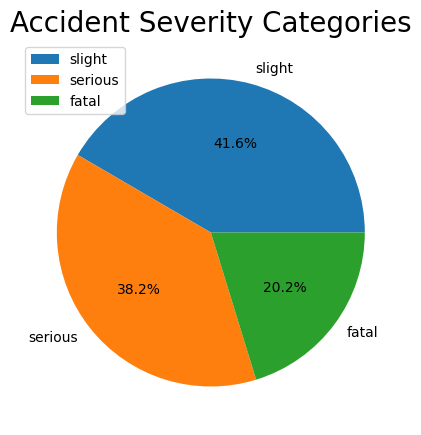

In [25]:

# let's list all categorical features
categorical_columns= ['accident_severity']

for col in categorical_columns:
    print(f"Categories and number of occurrences for '{col}'")
    pretty_print_df(WorkingData[col].value_counts())
    print()

plt.figure(figsize=(5, 5))
values = WorkingData[col].value_counts()
labels = values.index.tolist()
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Accident Severity Categories', fontsize=20)
plt.legend(loc=2)
plt.show()


Implementing FAMD to find the insignificant data fields.

component                           0         1
variable                                       
speed_limit                  0.015348  0.001699
age_of_oldest_driver         0.001686  0.000178
accident_severity            0.016744  0.049658
first_point_of_impact        0.000426  0.001759
hit_object_off_carriageway   0.040428  0.005207
junction_location            0.009964  0.004947
light_conditions             0.011432  0.009470
road_surface_conditions      0.015734  0.034457
sex_of_driver                0.002697  0.003913
skidding_and_overturning     0.021617  0.000245
vehicle_leaving_carriageway  0.043919  0.005052
vehicle_type                 0.006855  0.027461
weather_conditions           0.009126  0.039823


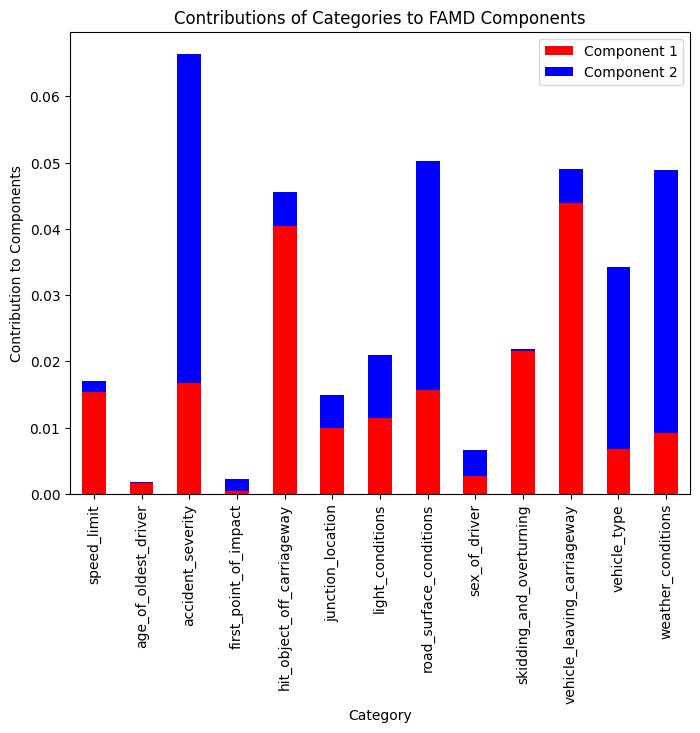

In [26]:
import prince
import pandas as pd
import matplotlib.pyplot as plt


# Perform FAMD
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn"
)
famd = famd.fit(all_data)

# Extract the contributions of each category to the first two components
contributions = famd.column_contributions_
contributions = contributions.abs().iloc[:, :2]

print(abs(contributions.iloc[:, :2]).to_string(index=True))

#set colours
colors = ['r', 'b']
# Plot a stacked bar chart
ax = contributions.plot(kind='bar', stacked=True, figsize=(8, 6),color=colors)

# Set the x-axis label
ax.set_xlabel('Category')

# Set the y-axis label
ax.set_ylabel('Contribution to Components')

# Set the title
ax.set_title('Contributions of Categories to FAMD Components')

# Set the legend
ax.legend(['Component 1', 'Component 2'])

# Show the plot
plt.show()


Standardising the 'speed_limit' column in the data set.

In [26]:
numerical_columns = ['speed_limit']#	'age_of_oldest_driver'

#Standardizing (removing mean and dividing by standard deviation)
from sklearn.preprocessing import StandardScaler
scaler_num= StandardScaler()
X['speed_limit']=scaler_num.fit_transform(X[['speed_limit']]) 
# X['age_of_oldest_driver']=scaler_num.fit_transform(X[['age_of_oldest_driver']]) 

X[['speed_limit']]#,'age_of_oldest_driver'

,speed_limit
0,-0.478965
1,-0.478965
2,0.245465
3,0.245465
4,-0.478965
...,...
31642,-0.478965
31643,1.694325
31644,2.418754
31645,-0.478965


# Encodind the categorical features

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# define the transformation
# ColumnTransformer takes a list of transformations. Each transformation is expressed
# as a tuple (name, transformer, columns).
ct = ColumnTransformer(
    [
        (
            "onehot_categorical", # --> name of the transformation
            OneHotEncoder(), # --> main function to apply 
        #     ['light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type','junction_location','skidding_and_overturning','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact',
        # 'sex_of_driver'], #-->columns to apply it to (we can give more than one column at once!)
         ['speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway']
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False #--> this keeps columns names simple. Try what happens if you set it as True
)

# create dataset copy for testing purposes
# tmp_data_no_nans = data_no_nans.copy()

# the output is an NUMPY ARRAY with the encoded columns.
X= ct.fit_transform(X) 



Label encoding the 'Y' the traget variable.

In [28]:
from sklearn.preprocessing import LabelEncoder

# create an object of the LabelEncoder class
lblEncoder_Y = LabelEncoder()   

# apply LblEncoder object to our target variables
Y = lblEncoder_Y.fit_transform(Y['accident_severity']) 
print(Y)
Yfortest = Y #note the combined name: original column + category (e.g. Gender_Female)


[1 0 1 ... 2 0 0]


Splitting the Data.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
                                                    shuffle= True, random_state=42)

# Implementing SGD Classifier.





In [32]:
import warnings
warnings.simplefilter("ignore") 

param_grid={'eta0': np.logspace(-6,-1,5), 
           'learning_rate': ['constant', 'invscaling','adaptive'],
          'max_iter': [20000]} 

lr = SGDClassifier(loss= 'log', class_weight='balanced')

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid = grid.fit(X_train, y_train)


print('Best estimator: {}\nWeights: {}, Intercept: {}\nBest params: {}'.format(
    grid.best_estimator_, grid.best_estimator_.coef_, grid.best_estimator_.intercept_,grid.best_params_))

Best estimator: SGDClassifier(class_weight='balanced', eta0=0.005623413251903491,
              learning_rate='constant', loss='log', max_iter=20000)
Weights: [[-1.17533119e+00 -1.19452042e+00 -9.80346295e-01 -9.17767142e-01
   1.48475689e+00  2.85808248e+00  1.38127921e+00 -1.30640490e+00
   4.76517939e-01  5.71303301e-01 -9.72946923e-01 -1.05541410e-01
   1.80727353e-01  1.81785615e-01 -1.82097241e-01 -2.69392798e+00
  -3.16855230e-02  3.25479266e+00 -2.26142563e-01 -2.28162279e-01
  -3.20338173e-03  7.80776981e-02  6.91828653e-02  5.69145100e-03
   1.73606833e-01 -9.87325170e-02  8.28823196e-02 -8.00800326e-03]
 [-3.45987337e-02  2.80615118e-02 -3.48972505e-02  6.01605092e-01
   3.88971432e-01 -1.04260700e+00  3.06901308e-01 -4.00366260e-01
  -5.96683597e-01 -4.04864949e-01  9.08083593e-01  6.46914440e-02
  -6.85902962e-02 -2.42183348e-01  1.52617248e-01  2.59359690e+00
  -6.95970860e-01 -9.06453878e-01 -7.85680403e-01 -2.98956711e-01
  -4.04429695e-02 -5.30219827e-02  9.66936852e-0

printing the accuracy for SGD.

In [33]:
# not that it's good practice to wrap common procedures into functions for ease of re-usability

def evaluate_classifier(grid, x_train, y_train, x_test, y_test):
    # model evaluation for training set
    y_train_predict = grid.predict(x_train)
    print("Training SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_train, y_train_predict):.3f}')

    # model evaluation for testing set
    y_test_predict = grid.predict(x_test)

    print("\nTesting SET")
    print("--------------------------------------")
    print(f'Accuracy: {accuracy_score(y_test, y_test_predict):.3f}')
    print(classification_report(y_test, grid.predict(X_test)))
    return y_train_predict, y_test_predict


y_train_predict, y_test_predict = evaluate_classifier(grid, X_train, y_train, X_test, y_test)


Training SET
--------------------------------------
Accuracy: 0.768

Testing SET
--------------------------------------
Accuracy: 0.761
              precision    recall  f1-score   support

           0       0.60      0.88      0.71      1143
           1       0.81      0.70      0.75      2309
           2       0.85      0.76      0.80      2409

    accuracy                           0.76      5861
   macro avg       0.75      0.78      0.75      5861
weighted avg       0.78      0.76      0.76      5861



# Implementing K - Nearest Neighbours (KNN) algorithm.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# we will use a classifier (we will skip details and what it does for now, so just use it as it is)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) #train_labels['Target'])  
## we train the classifier with the training data and labels: train_dataset_no_nans1 should be the training dataframe after:  
## i) filling in all missing values, ii) encoding all categorical features and (maybe) after feature scaling

# Checking the model's accuracy (performance); this should be performed on the test set and thus we use the test_dataset_no_nans and the test labels (after encoding)
performance = knn.score(X_test,y_test)
print(f'Performance is {performance:.3f}')

Performance is 0.742


Implementing 4 Different traditional models


1.   Logistic regression
2.   Decision Tree
3.   Random Forest
4.   KNN 



Training logistic_regression model...


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters: {'clf__C': 0.1, 'clf__penalty': 'l2'}
Training accuracy: 0.7662240708153362
Validation accuracy: 0.7705267647686074
Test accuracy: 0.760450435079338
logistic_regression Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71      1143
           1       0.80      0.71      0.75      2309
           2       0.85      0.76      0.80      2409

    accuracy                           0.76      5861
   macro avg       0.75      0.78      0.75      5861
weighted avg       0.78      0.76      0.76      5861

Confusion Matrix:
[[ 983  125   35]
 [ 375 1641  293]
 [ 286  290 1833]]


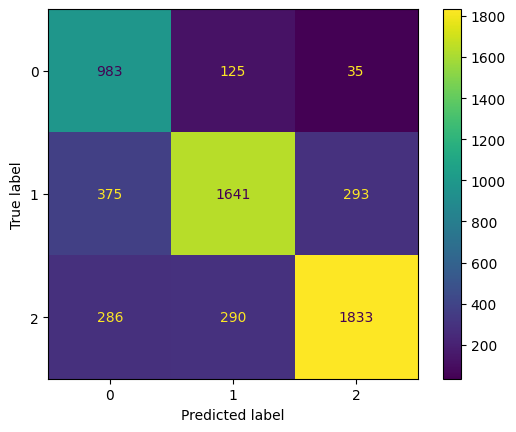

Training decision_tree model...
Best parameters: {'clf__max_depth': 10, 'clf__min_samples_split': 5}
Training accuracy: 0.7801951687729963
Validation accuracy: 0.7739390061846876
Test accuracy: 0.7662514929192971
decision_tree Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71      1143
           1       0.81      0.72      0.76      2309
           2       0.87      0.75      0.80      2409

    accuracy                           0.77      5861
   macro avg       0.76      0.79      0.76      5861
weighted avg       0.79      0.77      0.77      5861

Confusion Matrix:
[[1019   85   39]
 [ 401 1666  242]
 [ 293  310 1806]]


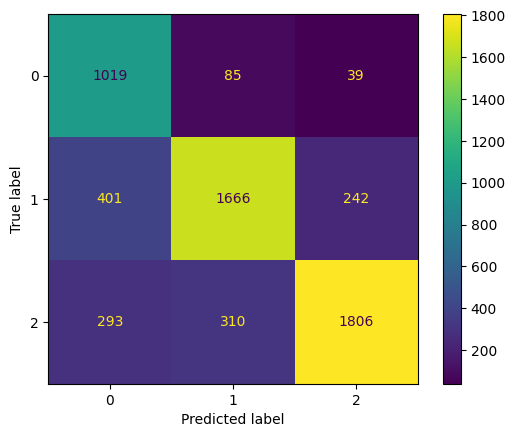

Training random_forest model...
Best parameters: {'clf__max_depth': 10, 'clf__n_estimators': 500}
Training accuracy: 0.7829147336426172
Validation accuracy: 0.7786308381317978
Test accuracy: 0.7698344992322129
random_forest Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.60      0.89      0.72      1143
           1       0.81      0.73      0.77      2309
           2       0.87      0.76      0.81      2409

    accuracy                           0.77      5861
   macro avg       0.76      0.79      0.76      5861
weighted avg       0.79      0.77      0.77      5861

Confusion Matrix:
[[1013   98   32]
 [ 379 1680  250]
 [ 290  300 1819]]


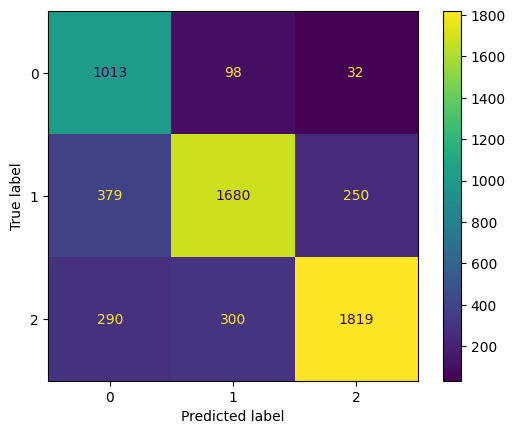

Training knn model...
Best parameters: {'clf__n_neighbors': 9}
Training accuracy: 0.7660107716098757
Validation accuracy: 0.7579441245468117
Test accuracy: 0.7537962804982085
knn Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68      1143
           1       0.77      0.74      0.76      2309
           2       0.83      0.75      0.79      2409

    accuracy                           0.75      5861
   macro avg       0.74      0.76      0.74      5861
weighted avg       0.77      0.75      0.76      5861

Confusion Matrix:
[[ 883  167   93]
 [ 324 1718  267]
 [ 251  341 1817]]


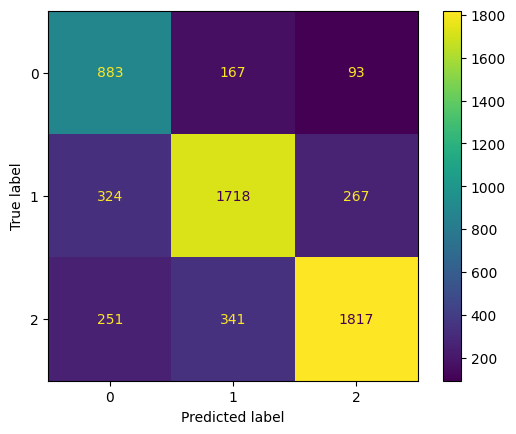

Evaluating best model on the test set...
Best parameters: {'memory': None, 'steps': [('clf', RandomForestClassifier(max_depth=10, n_estimators=500))], 'verbose': False, 'clf': RandomForestClassifier(max_depth=10, n_estimators=500), 'clf__bootstrap': True, 'clf__ccp_alpha': 0.0, 'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__max_leaf_nodes': None, 'clf__max_samples': None, 'clf__min_impurity_decrease': 0.0, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 500, 'clf__n_jobs': None, 'clf__oob_score': False, 'clf__random_state': None, 'clf__verbose': 0, 'clf__warm_start': False}
Test accuracy: 0.7698344992322129


In [ ]:

# Load data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define pipeline with StandardScaler, classifier, and grid search
pipe_lr = Pipeline([("clf", LogisticRegression())])
pipe_dt = Pipeline([ ("clf", DecisionTreeClassifier())])
pipe_rf = Pipeline([ ("clf", RandomForestClassifier())])
pipe_knn = Pipeline([("clf", KNeighborsClassifier())])

param_grid_lr = {"clf__C": [0.1, 1.0, 10.0], "clf__penalty": [ "l2"]}
param_grid_dt = {"clf__max_depth": [None, 5, 10], "clf__min_samples_split": [2, 5]}
param_grid_rf = {"clf__n_estimators": [100, 500], "clf__max_depth": [None, 5, 10]}
param_grid_knn = {"clf__n_neighbors": [3, 5, 7, 9]}

# Create a dictionary to store the models and their corresponding hyperparameters
models = {
    "logistic_regression": {"pipe": pipe_lr, "params": param_grid_lr},
    "decision_tree": {"pipe": pipe_dt, "params": param_grid_dt},
    "random_forest": {"pipe": pipe_rf, "params": param_grid_rf},
    "knn": {"pipe": pipe_knn, "params": param_grid_knn},
}

# Fit models and print accuracy scores on validation set
for name, model in models.items():
    print("Training", name, "model...")
    grid = GridSearchCV(model["pipe"], param_grid=model["params"], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    model["best_estimator"] = grid.best_estimator_
    print("Best parameters:", grid.best_params_)
    print("Training accuracy:", accuracy_score(y_train, grid.predict(X_train)))
    print("Validation accuracy:", accuracy_score(y_val, grid.predict(X_val)))
    print("Test accuracy:", accuracy_score(y_test, grid.predict(X_test)))
    print(name,"Evaluation Metrics:")
    print(classification_report(y_test, grid.predict(X_test)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, grid.predict(X_test)))
    cm = confusion_matrix(y_test,grid.predict(X_test))#, 
#                      labels= lblEncoder_Y.classes_) # this is to give the real categories, not their encoded numbers

# let's show the confusion matrix in a plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)#,
                               #display_labels= lblEncoder_Y.classes_) # this is to give the real categories, not their encoded numbers
    disp.plot()
    plt.show()

# Evaluate the best model on the test set
best_model = max(models.values(), key=lambda x: accuracy_score(y_val, x["best_estimator"].predict(X_val)))
print("Evaluating best model on the test set...")
print("Best parameters:", best_model["best_estimator"].get_params())
print("Test accuracy:", accuracy_score(y_test, best_model["best_estimator"].predict(X_test)))


# Neural Network

Performing one hot encoding on Y

In [36]:

Y = pd.DataFrame(WorkingData,columns=['accident_severity'])

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# define the transformation
# ColumnTransformer takes a list of transformations. Each transformation is expressed
# as a tuple (name, transformer, columns).
ct = ColumnTransformer(
    [
        (
            "onehot_categorical", # --> name of the transformation
            OneHotEncoder(), # --> main function to apply 
            ['accident_severity'], #-->columns to apply it to (we can give more than one column at once!)
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False #--> this keeps columns names simple. Try what happens if you set it as True
)

# create dataset copy for testing purposes
# tmp_data_no_nans = data_no_nans.copy()

# the output is an NUMPY ARRAY with the encoded columns.
y_encoded_array= ct.fit_transform(Y) 




Model 1 With one hidden layer with relu as the activation function.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 50)                1450      
                                                                 
 dense_22 (Dense)            (None, 3)                 153       
                                                                 
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________
None
{0: 1.6465005931198102, 1: 0.8736500364407341, 2: 0.8012639382614772}
Epoch 1/50
183/183 [==============================] - 1s 4ms/step - loss: 0.6481 - accuracy: 0.7509 - val_loss: 0.6241 - val_accuracy: 0.7737
Epoch 2/50
183/183 [==============================] - 1s 4ms/step - loss: 0.5998 - accuracy: 0.7707 - val_loss: 0.6298 - val_accuracy: 0.7745
Epoch 3/50
183/183 [==============================] - 1s 4ms/step - loss: 0.5962 - accura

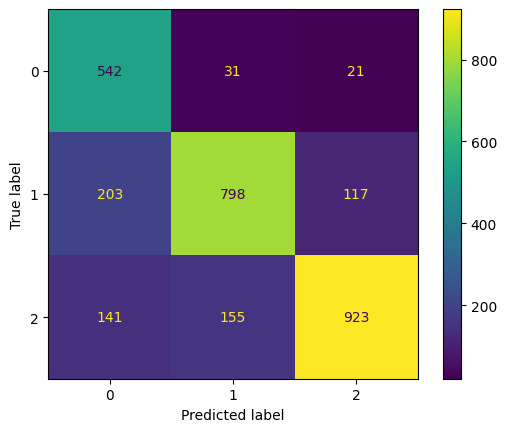

In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.utils import np_utils
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_array,stratify = Y, train_size=0.9, random_state=42)

# Split training set into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)
# create a simple model with ONE hidden layer only
model = models.Sequential()
# we will create a hidden layer with 20 nodes. 
hidden_layer1_nodes = 50

num_of_input_features = X_train.shape[1] #number of features = number of columns in the input matrix

# We can specify an input layer to tell Keras what input to expect.
# we tell Keras how many features to expect for each datapoint. This way Keras
# knows how many weights are needed between the input and the first hidden layer
model.add(layers.Input(shape=(num_of_input_features,))) 
model.add(layers.Dense(hidden_layer1_nodes, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) #is it clear why here we use "sigmoid" and use "softmax" for multi-class problems?

# as metric we choose the accuracy: the total number of correct predictions made
# Adam is a typical choice for an optimizer and tends to perform well in practice
# the most typical choice for the loss function is the binary cross entropy since 
# we are solving a binary classification task. If we were solving a multi-class classification
# task, we'd choose the categorical cross entropy (that is, the more general version) 
learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(), #we use this function for BINARY CLASSIFICATION
              metrics=['accuracy'])

# let's print a summary of the model to see what it's like
print(model.summary())


# compute class weights to counteract data imbalance
from sklearn.utils import class_weight
y_integers = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight(class_weight= "balanced", 
    classes = np.unique(y_integers), y = y_integers)

# we turn the weights into a dictionary
class_weights = dict(zip(np.unique(y_integers), class_weights))

# Let's print the results
# note that encoded label 0 corresponds to the original label 'N': there are fewer instances of 'N' so this class is given a higher weight in the loss function
print(class_weights)


# Training

# let's define some relevant hyper-parameters:
batch_size = 130 # The batch size indicates how many data points we use to compute each update to the parameters of the models (based on the gradient of the loss)
epochs = 50 #how long we train the model for
validation_split = 0.1  #Fraction of the training data to be used as validation data.
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split= validation_split,
                    class_weight= class_weights,
                    )
# note that the output variable "history" keeps track of the model performance at each epoch

# let's see what's within the 'history' variable
history.history.keys()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import balanced_accuracy_score

# Check performance on test data
test_probabilities = model.predict(X_test)
# There is a small difference from scikit-learn when we call .predict()
# Keras returns the class probabilities rather than the predictions
# For a binary classification problem, this is the probability that a data point
# belongs to class 1.
# So, to get the class we apply a threshold of 0.5: if the probability of being in
# class 1 is higher than 0.5 we assign that data point to class 1, otherwise to
# class 0. This is done by the following line:
test_predictions = test_probabilities 
print(test_predictions)
y_pred=np.argmax(test_predictions, axis=1)
print(y_pred)
y_test=np.argmax(y_test, axis=1)



# let's show the classification report with all the metrics
# think about which metrics you think are the most important ones for this problem!
print(classification_report(y_test,y_pred)) 
                            #target_names= lblEncoder_Y.classes_)) # this is to give the real categories, not their encoded numbers

# let's also print the balanced accuracy score, since we know the dataset is not balanced
print(f'The balanced accuracy score is {balanced_accuracy_score(y_test,y_pred):.3f}\n')

# let's get all the numbers for the confusion matrix
cm = confusion_matrix(y_test,y_pred)#, 
#                      labels= lblEncoder_Y.classes_) # this is to give the real categories, not their encoded numbers

# let's show the confusion matrix in a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)#,
                               #display_labels= lblEncoder_Y.classes_) # this is to give the real categories, not their encoded numbers
disp.plot()
plt.show()


Plotting the graph for graphs for Loss vs Epoch and Accuracy vs Epoch. This is to check for overfitting.


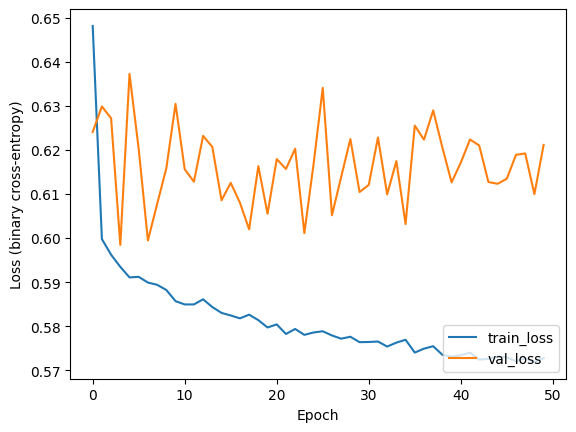

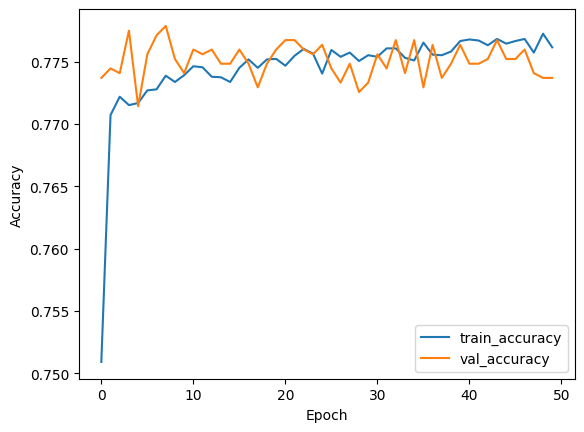

In [42]:
# Plot training curves for both training and validation data
# loss per epoch
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (binary cross-entropy)')
plt.legend(loc='lower right')

#accuracy per epoch
plt.figure()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Model 2 with two hidden layers with softmax and relu as the activation funtions. We also implement dropout to avoid over fitting of the models.

92/92 [==============================] - 0s 1ms/step


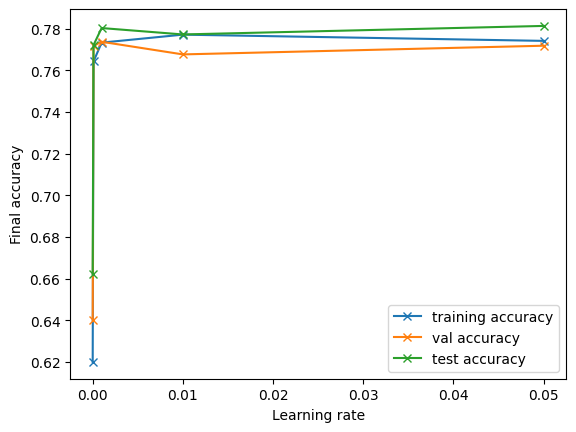

best learnign rate 0.001
92/92 [==============================] - 0s 1ms/step
[[0.00833346 0.09634989 0.8953167 ]
 [0.00685962 0.6271291  0.36601126]
 [0.00345633 0.7942374  0.2023063 ]
 ...
 [0.803565   0.05762202 0.13881299]
 [0.02472777 0.13199289 0.8432793 ]
 [0.5181573  0.20925961 0.2725831 ]]
[2 1 1 ... 0 2 0]
              precision    recall  f1-score   support

           0       0.60      0.90      0.72       573
           1       0.82      0.74      0.77      1136
           2       0.88      0.76      0.82      1222

    accuracy                           0.78      2931
   macro avg       0.77      0.80      0.77      2931
weighted avg       0.80      0.78      0.78      2931

The balanced accuracy score is 0.797



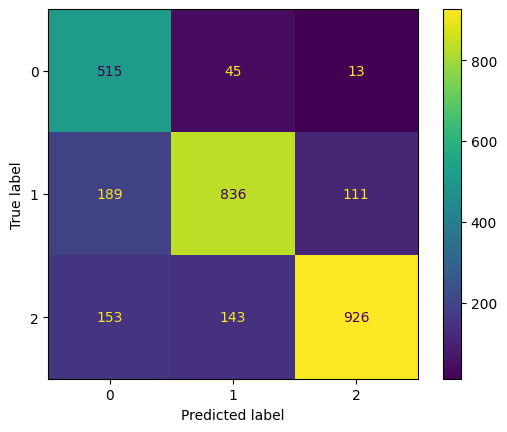

In [43]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Dropout
# For example, let's compute and visualize how the accuracy changes with different learning rates

# First, recreate the model. 
# We'll wrap the different stages into a function, since then it's easier to play with the parameters

def create_model_multi_hidden(n_hidden=30, num_of_input_features= X_train.shape[1]):
    model = models.Sequential()
    model.add(layers.Input(shape=(num_of_input_features))) 
    
    model.add(layers.Dense(n_hidden, activation='softmax'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(n_hidden, activation='relu'))

    model.add(layers.Dense(3, activation='softmax'))

    return model

def model_compile_and_training(model, X_train, y_train, #test_dataset_no_nans, test_encoded_labels,
                               optimizer_name = 'Adam', learning_rate= 0.01,
                               n_epochs= 200, batch_size=300,
                               validation_split= 0.1):
    if optimizer_name== 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate= learning_rate)

    # as metric we choose the accuracy: the total number of correct predictions made
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

    #print(model.summary())

    # Training
    validation_split = 0.1  #Fraction of the training data to be used as validation data.
    history = model.fit(X_train, 
                    y_train, 
                    epochs=n_epochs, 
                    batch_size=batch_size, 
                    validation_split= validation_split,
                    verbose=0, #this avoids getting lots of output
                    )
    return model, history


# Generate some random data for demonstration purposes
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder

# X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, random_state=42)

# Encode the target variable using one-hot encoding
# encoder = OneHotEncoder(sparse=False)
# y_one_hot = encoder.fit_transform(Y.reshape(-1, 1))

# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_array, train_size=0.9, random_state=42)


l_rates = [0.00001, 0.0001, 0.001, 0.01, 0.05]
final_accuracies_train = []
final_accuracies_val = []
final_accuracies_test = []
for i, l_rate in enumerate(l_rates):
    model = create_model_multi_hidden()

    model, history = model_compile_and_training(model, X_train, y_train, 
                               learning_rate= l_rate)

    final_accuracies_train.append(history.history['accuracy'][-1])
    final_accuracies_val.append(history.history['val_accuracy'][-1])
    # predict the test labels and save the accuracy score
    test_probabilities = model.predict(X_test)
    test_predictions = np.argmax(test_probabilities, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    final_accuracies_test.append(accuracy_score(y_test_labels, test_predictions))
    # plot the results
plt.figure()
plt.plot(l_rates, final_accuracies_train, '-x', label='training accuracy')
plt.plot(l_rates, final_accuracies_val, '-x', label= 'val accuracy')
plt.plot(l_rates, final_accuracies_test, '-x', label= 'test accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Final accuracy')
_ =plt.legend()
plt.show()

best_learnig_rate=np.argmax(final_accuracies_val)
print('best learnign rate',l_rates[best_learnig_rate])

model = create_model_multi_hidden()

model, history = model_compile_and_training(model, X_train, y_train, 
                               learning_rate= l_rates[best_learnig_rate])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import balanced_accuracy_score

# Check performance on test data
test_probabilities = model.predict(X_test)
# There is a small difference from scikit-learn when we call .predict()
# Keras returns the class probabilities rather than the predictions
# For a binary classification problem, this is the probability that a data point
# belongs to class 1.
# So, to get the class we apply a threshold of 0.5: if the probability of being in
# class 1 is higher than 0.5 we assign that data point to class 1, otherwise to
# class 0. This is done by the following line:
test_predictions = test_probabilities 
print(test_predictions)
y_pred=np.argmax(test_predictions, axis=1)
print(y_pred)
y_test=np.argmax(y_test, axis=1)



# let's show the classification report with all the metrics
# think about which metrics you think are the most important ones for this problem!
print(classification_report(y_test,y_pred)) 
                            #target_names= lblEncoder_Y.classes_)) # this is to give the real categories, not their encoded numbers

# let's also print the balanced accuracy score, since we know the dataset is not balanced
print(f'The balanced accuracy score is {balanced_accuracy_score(y_test,y_pred):.3f}\n')

# let's get all the numbers for the confusion matrix
cm = confusion_matrix(y_test,y_pred)#, 
#                      labels= lblEncoder_Y.classes_) # this is to give the real categories, not their encoded numbers

# let's show the confusion matrix in a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)#,
                               #display_labels= lblEncoder_Y.classes_) # this is to give the real categories, not their encoded numbers
disp.plot()
plt.show()


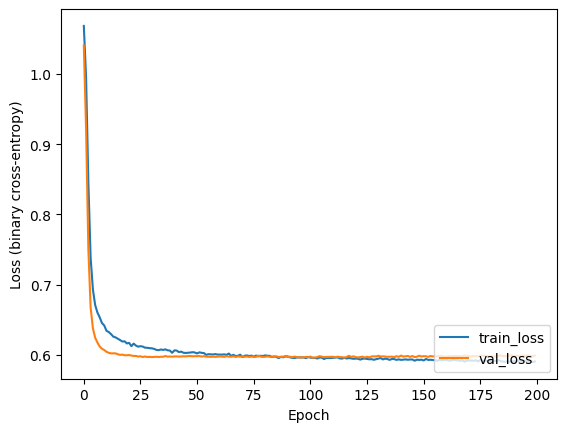

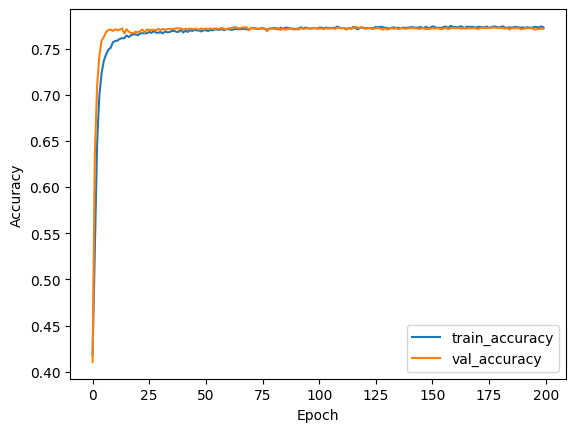

In [44]:
# Plot training curves for both training and validation data
# loss per epoch
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (binary cross-entropy)')
plt.legend(loc='lower right')

#accuracy per epoch
plt.figure()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')